## Doctor Fee Dataset

This dataset includes the details of various doctors with various features and we have to predict the fees of the doctor on the basis of other featurs.I have collected this dataset from the github link(https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects).

lets import the numpy,pandas for data preprocessing,matplotlib and seaborn for visualizations and other sklearn models to evaluate metrics and operation tools for modelling

In [1]:
#importing the required libraries and metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#importing warnings to suppress when raised
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the dataset from the file folder
train=pd.read_excel('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Doctor_fee_consultation/Doctor Folder/Final_Train.xlsx')
traindata=pd.DataFrame(train)
test=pd.read_excel('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Doctor_fee_consultation/Doctor Folder/Final_Test.xlsx')
testdata=pd.DataFrame(test)

In [3]:
#lets see the structure of data for both train and test
traindata.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
testdata.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


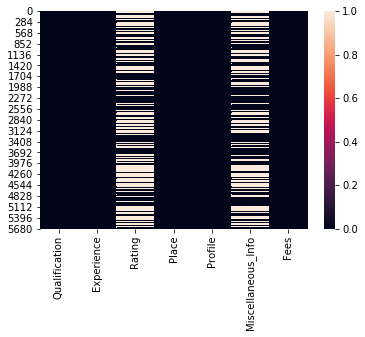

In [5]:
#looking for the null values in train data
sns.heatmap(traindata.isnull())

#it shows there is some null values in miscellanous info and rating

In [6]:
#lets see the count of null values
traindata.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

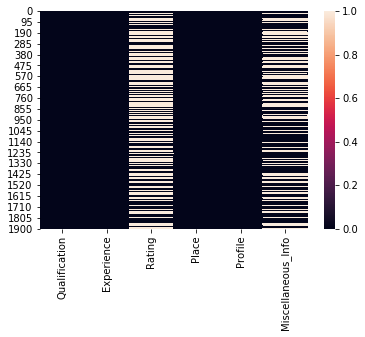

In [7]:
#looking for the null values in test data
sns.heatmap(testdata.isnull())

#the same column here is also have null values

In [8]:
#lets see the count of null values
testdata.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [9]:
#getting the shape of both datasets
print(traindata.shape)
print(testdata.shape)

(5961, 7)
(1987, 6)


In [10]:
#marking the dataset before concat
traindata['Data']='Train'
testdata['Data']='Test'

In [11]:
#Merging the datasets 
fees=pd.concat([traindata,testdata],ignore_index=True)
fees.head()

,Data,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,Train,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [12]:
#checking the null values of concatenaed dataset
fees.isnull().sum()

#it shows the null values in miscellanous_info,place and rating mainly.Fees should not be considered cause its a size of test datset exactly and there is no price column

Data                     0
Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dtype: int64

In [13]:
#lets see the info of each features in dataset
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
Data                  7948 non-null object
Experience            7948 non-null object
Fees                  5961 non-null float64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
dtypes: float64(1), object(7)
memory usage: 496.9+ KB


In [14]:
#lets see the counts of unique values in each column
for col in fees.columns:
    print(fees[col].value_counts())

Train    5961
Test     1987
Name: Data, dtype: int64
9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
61 years experience      1
60 years experience      1
58 years experience      1
64 years experience      1
66 years experience      1
Name: Experience, Length: 64, dtype: int64
100.0    1306
500.0     938
200.0     904
300.0     864
400.0     424
250.0     307
150.0     253
600.0     215
700.0     153
350.0     143
800.0     143
50.0       81
450.0      65
750.0      34
550.0      22
650.0      21
900.0      18
70.0       18
80.0       12
60.0       11
30.0        4
40.0        2
130.0       2
180.0       2
10.0        2
260.0       2
380.0       2
220.0       1
430.0       1
630.0       1
299.0       1
20.0        1
280.0       1
230.0       1
5.0         1
850.0       1
950.0       1
125.0       1
920.0       1
499.0       1
Name: Fees, dtype: int64
Acrylic Partial Dentur

In [15]:
#lets extract the main info from the experience column first
fees['Experience']=fees['Experience'].str.split(' ').str[0]

#experience column is in the object datatype,lets convert it to int datatype
fees['Experience']=fees['Experience'].astype(int)

In [16]:
#miscellanous info columns has the information in diffrent variants,so its better to drop it rathere than imputing it
fees.drop('Miscellaneous_Info',axis=1,inplace=True)

Place column has two diffrent information i.e location and city.
Lets impute it first for null values and then seperate it

In [17]:
#filling the null values
fees["Place"].fillna("Unknown,Unknown",inplace=True)

In [18]:
#seperating place to location and city
fees["Place"] = fees["Place"].str.split(",")
fees["City"] = fees["Place"].str[1]
fees["location"] = fees["Place"].str[0]

In [19]:
#take a look for unique value counts in city
fees['City'].value_counts()

 Bangalore             1678
 Mumbai                1608
 Delhi                 1601
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
Unknown                  31
 Sector 5                 1
Name: City, dtype: int64

In [20]:
#take a look for unique value counts in location
fees['location'].value_counts()

HSR Layout         97
Andheri West       97
Dwarka             94
Banjara Hills      85
Mulund West        81
                   ..
Netaji Nagar        1
Malumichampatti     1
Muttada             1
Sangam Vihar        1
MKB Nagar           1
Name: location, Length: 938, dtype: int64

In [21]:
#lets see for rating column
fees['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%', '52%'],
      dtype=object)

In [22]:
#first we need to remove '%' from the rating and convert it to int
fees['Rating']=fees['Rating'].str.split('%').str[0]

In [23]:
#we know there is null values in rating column from above computation
fees['Rating'].mode()

0    100
dtype: object

In [24]:
#filling for null values present 
fees['Rating'].fillna('100',inplace=True)

In [25]:
#converting the rating datatype to int
fees['Rating']=fees['Rating'].astype(int)

Qualification has many diffrent information,so we take the first 3 string seperated by commas 

In [26]:
#creating function to change the qual into int 
def rep(x):
    if x=='0':
        x=0
    else:
        x=1
        return x

In [27]:
#extracting and processing the first string from qualification

fees['q1']=fees['Qualification'].str.split(',').str[0]
fees['q1']= fees['q1'].apply(lambda x:rep(x))

In [28]:
#extracting and processing the second string from qualification

fees['q2']=fees['Qualification'].str.split(',').str[1]
fees['q2'].fillna('0',inplace=True)

In [29]:
fees['q2']= fees['q2'].apply(lambda x:rep(x))
fees['q2'].isnull().sum()

2571

In [30]:
#replacing for the null values
fees['q2'].fillna(0,inplace=True)

In [31]:
#as the data is is float datatype,so change it to int
fees['q2']=fees['q2'].astype(int)

In [32]:
#extracting and processing the third string from qualification

fees['q3']=fees['Qualification'].str.split(',').str[2]
fees['q3'].fillna('0',inplace=True)

In [33]:
fees['q3']= fees['q3'].apply(lambda x:rep(x))
fees['q3'].isnull().sum()

6088

In [34]:
#replacing for the null values
fees['q3'].fillna(0,inplace=True)

In [35]:
#converting the datatype into int
fees['q3']=fees['q3'].astype(int)

In [36]:
#lets see the detailed info of the column
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 12 columns):
Data             7948 non-null object
Experience       7948 non-null int32
Fees             5961 non-null float64
Place            7948 non-null object
Profile          7948 non-null object
Qualification    7948 non-null object
Rating           7948 non-null int32
City             7947 non-null object
location         7948 non-null object
q1               7948 non-null int64
q2               7948 non-null int32
q3               7948 non-null int32
dtypes: float64(1), int32(4), int64(1), object(6)
memory usage: 621.1+ KB


In [37]:
#lets drop the place and qualification columns as we alraedy computed and extracted info to other columns from these
fees.drop(['Place','Qualification'],axis=1,inplace=True)

In [38]:
#lets see the structure of data now
fees.head()

,Data,Experience,Fees,Profile,Rating,City,location,q1,q2,q3
0,Train,24,100.0,Homeopath,100,Ernakulam,Kakkanad,1,1,0
1,Train,12,350.0,Ayurveda,98,Bangalore,Whitefield,1,1,0
2,Train,9,300.0,ENT Specialist,100,Bangalore,Mathikere - BEL,1,1,0
3,Train,12,250.0,Ayurveda,100,Bangalore,Bannerghatta Road,1,1,0
4,Train,20,250.0,Ayurveda,100,Chennai,Keelkattalai,1,0,0


In [39]:
#converting qualification column q1 and q2 as single column
fees['Main_Qual']=fees.iloc[:,7:9].sum(axis=1)

#as we converted these to one column,lets drop it
fees.drop(['q1','q2'],axis=1,inplace=True)

In [40]:
#checking for the null values now
fees.isnull().sum()

#Fees column show 1987 which is from test data,so no need to worry.We just have to adjust one City

Data             0
Experience       0
Fees          1987
Profile          0
Rating           0
City             1
location         0
q3               0
Main_Qual        0
dtype: int64

In [41]:
#getting the mode values for city column
fees['City'].mode()

0     Bangalore
dtype: object

In [42]:
#replacing null values by mode
fees['City']=fees['City'].replace(np.NaN,'Bangalore')

In [43]:
#lets check for dataset structure
fees.head()

,Data,Experience,Fees,Profile,Rating,City,location,q3,Main_Qual
0,Train,24,100.0,Homeopath,100,Ernakulam,Kakkanad,0,2
1,Train,12,350.0,Ayurveda,98,Bangalore,Whitefield,0,2
2,Train,9,300.0,ENT Specialist,100,Bangalore,Mathikere - BEL,0,2
3,Train,12,250.0,Ayurveda,100,Bangalore,Bannerghatta Road,0,2
4,Train,20,250.0,Ayurveda,100,Chennai,Keelkattalai,0,1


Data Visualisation

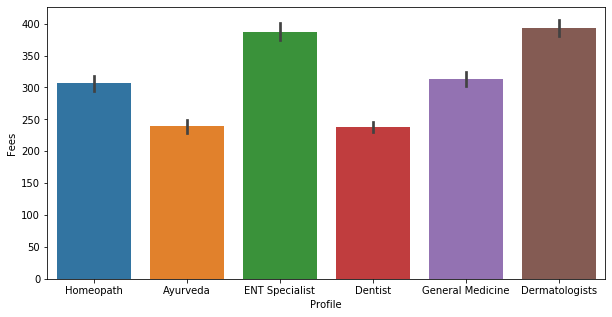

In [44]:
#plotting barplot b/w profile and fees
plt.figure(figsize=(10,5))
sns.barplot(x='Profile',y='Fees',data=fees)

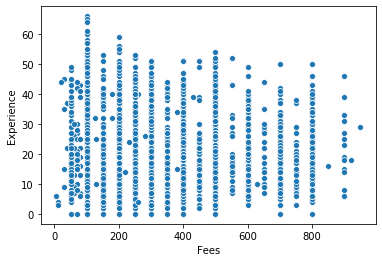

In [45]:
#plotting the scatterplot b/w experience and fees
sns.scatterplot(x='Fees',y='Experience',data=fees)

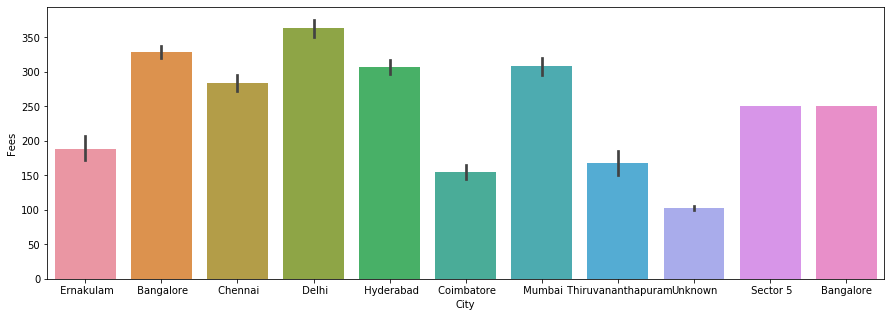

In [46]:
#lets see the profile in each city
plt.figure(figsize=(15,5))
sns.barplot(x='City',y='Fees',data=fees)
#the fees in delhi is very high

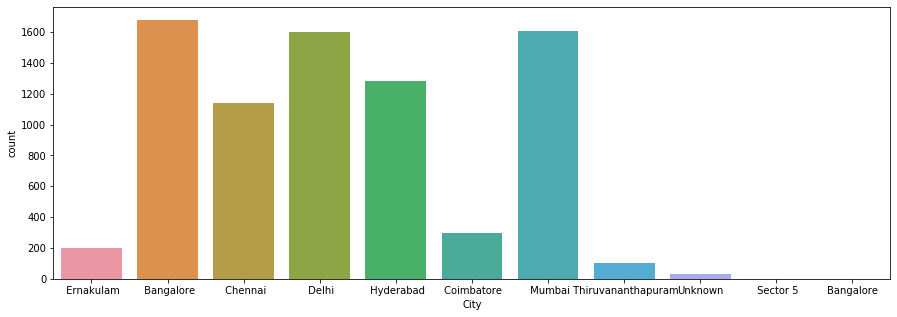

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(fees['City'])
#the count for data in bangalore os higher among all others

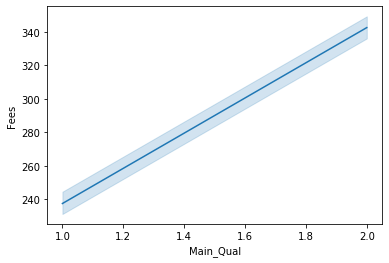

In [48]:
#plotting lineplot b/w main_qual and fees
sns.lineplot(x='Main_Qual',y='Fees',data=fees)

#so with the increase in qual fees also increases

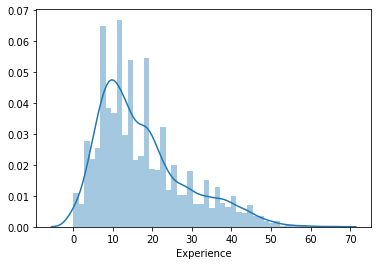

In [49]:
sns.distplot(fees['Experience'])

In [50]:
#we need some columns to convert using labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Profile','City','location']
for val in list:
    fees[val]=le.fit_transform(fees[val].astype(str))

In [51]:
#lets seperate the train and test datset
final_train=fees.loc[fees['Data']=='Train']
final_test=fees.loc[fees['Data']=='Test']

In [52]:
final_train.drop('Data',axis=1,inplace=True)

In [53]:
final_test.drop(['Data','Fees'],axis=1,inplace=True)

In [54]:
#lets see the correlation of the data
final_train.corr()

,Experience,Fees,Profile,Rating,City,location,q3,Main_Qual
Experience,1.000000,0.002117,0.202073,-0.149594,0.011142,0.002250,0.006628,0.052690
Fees,0.002117,1.000000,0.145226,-0.154713,-0.043587,-0.062575,0.163601,0.258378
Profile,0.202073,0.145226,1.000000,-0.047013,-0.018281,0.017140,0.030583,0.013341
Rating,-0.149594,-0.154713,-0.047013,1.000000,0.072231,0.034958,-0.089621,-0.171668
City,0.011142,-0.043587,-0.018281,0.072231,1.000000,-0.065198,-0.045640,-0.074295
location,0.002250,-0.062575,0.017140,0.034958,-0.065198,1.000000,-0.017858,-0.004898
q3,0.006628,0.163601,0.030583,-0.089621,-0.045640,-0.017858,1.000000,0.382813
Main_Qual,0.052690,0.258378,0.013341,-0.171668,-0.074295,-0.004898,0.382813,1.000000


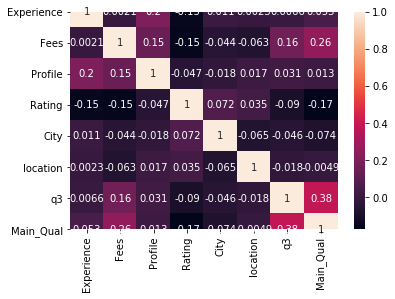

In [55]:
#plotting heatmap for train correlation data
sns.heatmap(final_train.corr(),annot=True)

In [56]:
#statistical summary of data
final_train.describe()

,Experience,Fees,Profile,Rating,City,location,q3,Main_Qual
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,307.944640,2.441872,97.610636,3.103171,448.872337,0.229995,1.670861
std,11.142798,190.920373,1.658014,5.881539,2.362371,277.978478,0.420865,0.469940
min,0.000000,5.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,150.000000,1.000000,98.000000,1.000000,213.000000,0.000000,1.000000
50%,14.000000,300.000000,2.000000,100.000000,3.000000,446.000000,0.000000,2.000000
75%,23.000000,500.000000,4.000000,100.000000,5.000000,681.000000,0.000000,2.000000
max,66.000000,950.000000,5.000000,100.000000,10.000000,937.000000,1.000000,2.000000


from the statistical summary,I observe the data need to be scaled and outliers need to be handled in some columns

In [57]:
#importing zscore to handle outliers
from scipy.stats import zscore
z=np.abs(zscore(final_train))
final_train_new=final_train[(z<3).all(axis=1)]
final_train_new.shape

(5767, 8)

In [58]:
final_train.shape

(5961, 8)

So there is overall diffrence of almost 200 rows,so lets take the modified dataset as the final one

In [59]:
final_train=final_train_new

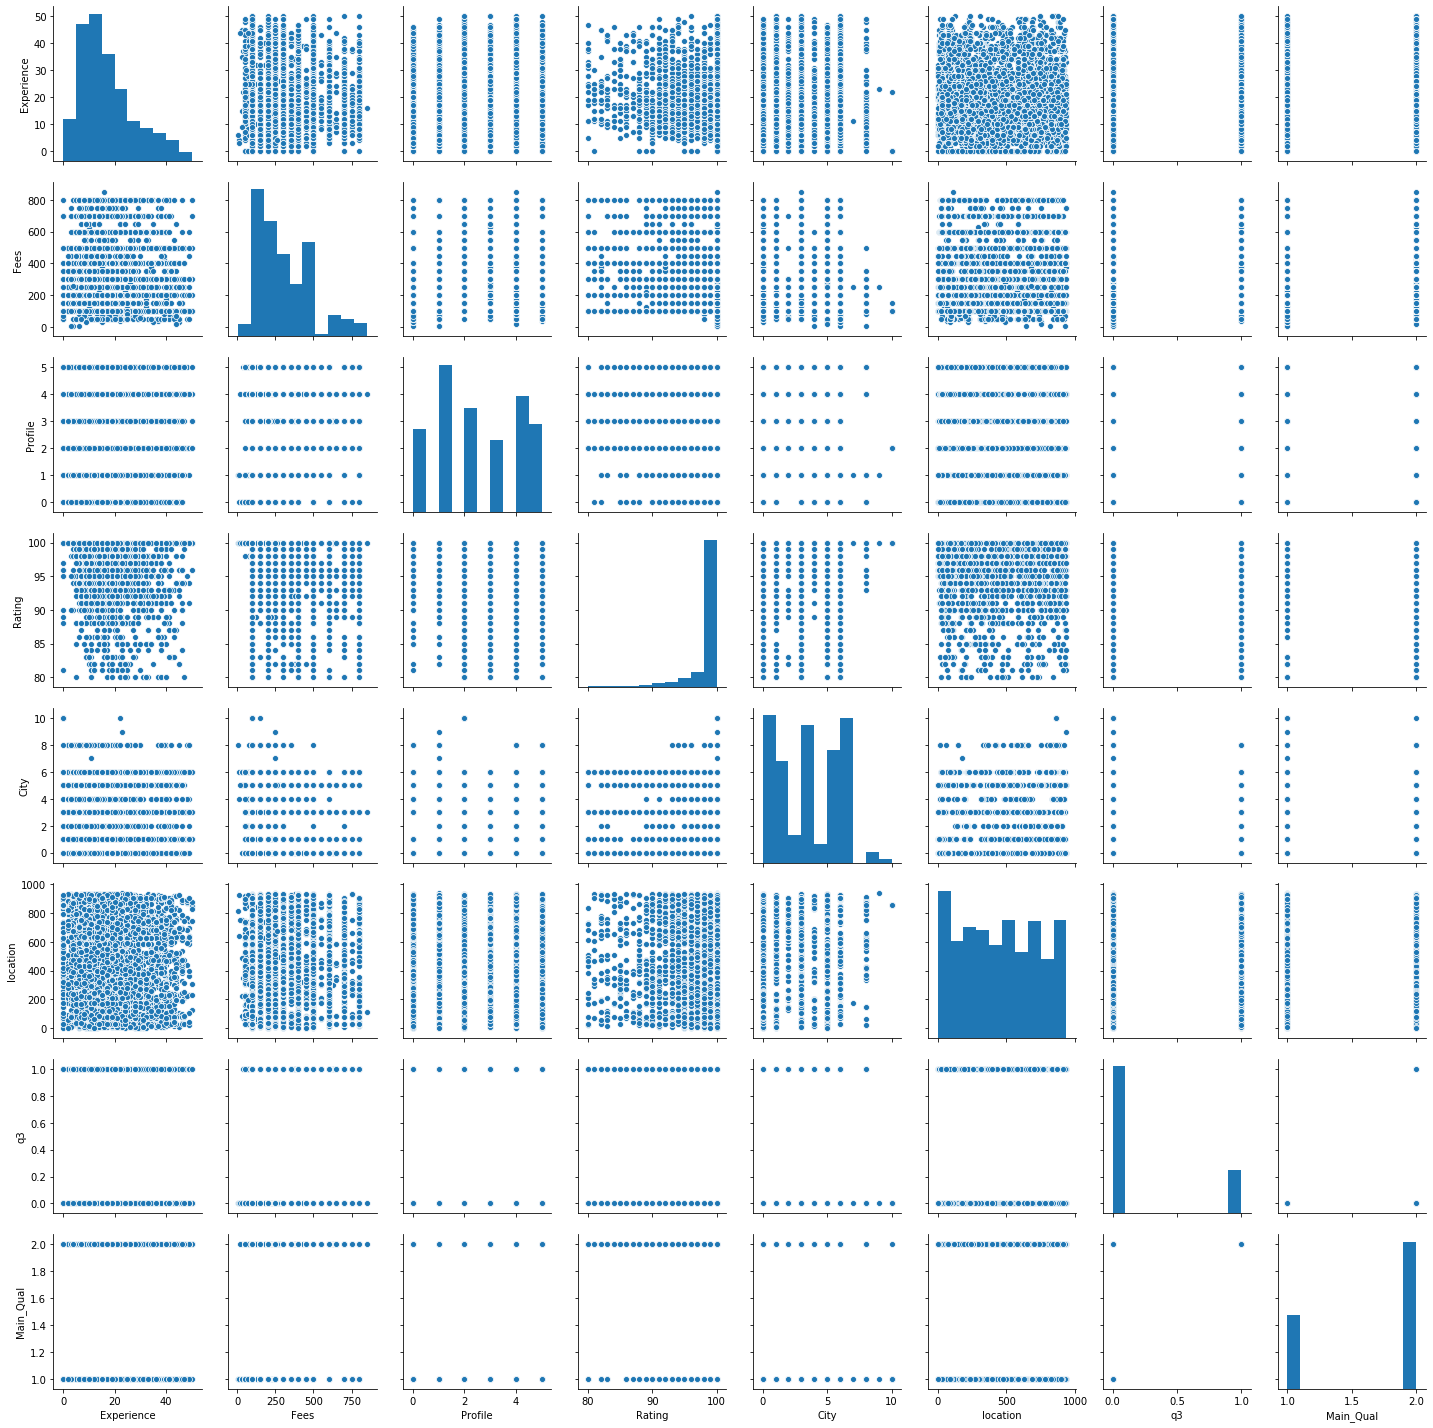

In [60]:
#plotting pairplot
sns.pairplot(final_train)

In [61]:
final_train.skew()

Experience    0.918798
Fees          0.725505
Profile       0.138511
Rating       -2.696433
City          0.113856
location      0.091269
q3            1.299192
Main_Qual    -0.700953
dtype: float64

In [62]:
#handling skew  in all columns
for col in final_train.columns:
    if final_train[col].skew()>0.55:
        final_train[col]=np.log1p(final_train[col])
    if final_train[col].skew()<-0.55:
        final_train[col]=np.square(final_train[col])

Lets shape the data for machine learning operations

In [63]:
#seperating input and target variables
def_x=final_train.drop('Fees',axis=1)
y=final_train['Fees']

In [64]:
#scaling the input data using standard scaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(def_x)
x=pd.DataFrame(x,columns=def_x.columns)

In [65]:
#creating function to determine random state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

Lets start applying algorithm one by one

Linear Regression

In [66]:
# using Linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.10676116676416725 at 73


K-Neighbors

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#getting the best neighbors using GridSearchCV
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 36}

In [68]:
knr=KNeighborsRegressor(n_neighbors=36)
random(knr)

0.13061940572522324 at 73


Support Vector Machine

In [69]:
#applying support vector machine
from sklearn.svm import SVR
svm=SVR()

#getting the best kernel using GridSearchCV
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [70]:
svm=SVR(kernel='rbf')
random(svm)

0.11775310831389607 at 73


Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

#getting the best params using GridsearchCV
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [72]:
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.15267901612396984 at 73


Gradient Boosting Regressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#getting the best params
parameters={'learning_rate':[1,0.1,0.01,0.001],'n_estimators':[10,100,500]}
grid=GridSearchCV(gbr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [74]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
random(gbr)

0.20665251950679864 at 49


From all the above algorithms,I get the best score of 0.20 from the Gradient Boosting Classifier at the random state of 49,So taking it as a final algorithm,lets solve furthur

In [75]:
#solving the metrics for selected algorithm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=49)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('mean_squared_error=',mean_squared_error(y_test,pred))
print('mean_absolute_error=',mean_absolute_error(y_test,pred))
print('r2_score=',r2_score(y_test,pred))
print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

mean_squared_error= 0.34685456769452483
mean_absolute_error= 0.4664500169013164
r2_score= 0.2610465083244634
root_mean_squared_error= 0.5889436031527339


In [76]:
#cross_val_score
score=cross_val_score(gbr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.14469716 0.24655397 0.26952844 0.22894804 0.26100462]
0.23014644762825193
0.04488962431883057


Lets apply the following algorithm for test data.

In [77]:
#Applying model on the test set
test_fee_pred=gbr.predict(final_test)

In [78]:
#storing as dataFrame
test_fee_pred=pd.DataFrame(test_fee_pred,columns=["fees"])

#Storing results as csv
test_fee_pred.to_csv("fees_predictions.csv",index=False)

In [79]:
#saving the model
from sklearn.externals import joblib
joblib.dump(gbr,'gbr_doctor_fee_assessment.pkl')

['gbr_doctor_fee_assessment.pkl']

## Conclusion

After importing the dataset,I process the train data and test data for null values check to get some overview.Then i concat both datsets and check the value_counts for each column.Then I dropped some data,compute some data to extract useful means from them and also impute them for deducing null values.i used various plots b/w features to get the data insights.Correlation and statistical summary also checked for better information.

Then i seperate the train and test data and starts shaping train data for applying algorithm.After applying diffrent algorithms,I get Gradient Boosting Regressor as the best algorithm.